Total number neurons present in > 2 datasets: 65
21%


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


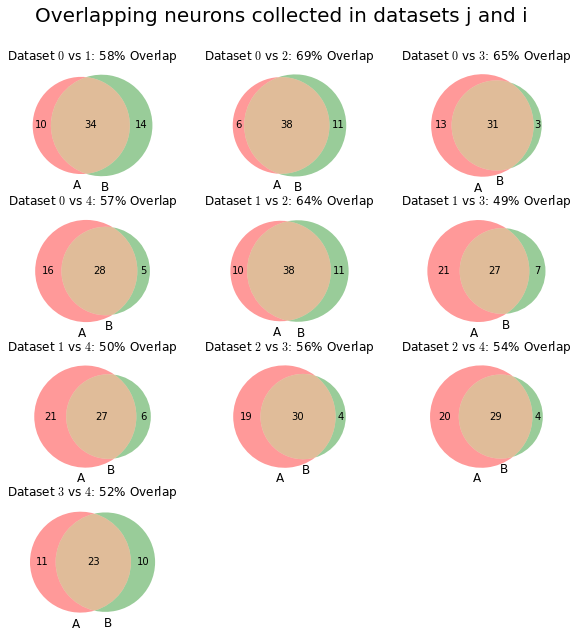

In [6]:
import transform as tf
import dimensions_kit as dk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

transformed = []
pca = []
predicted = []

for worm, data in tf.wormData.iteritems():
    wd_pca, wd_transformed = tf.scikit_pca(data['deltaFOverF_deriv'], 3)  
    
    #Storing this for later use
    transformed.append(wd_transformed)
    pca.append(wd_pca)
    """
    Using our PC's we can increase the dimensionality of 
        our reduced data, from 3 to 107, thus getting a blurred
        dataset as predicted by PC's 1 and 2. It contains
        most of the information contained in the original
        data
    
    The operation is very simple - a transformation
        of 3 dimensional data to 107 dimensional data as the 
        dot product of the components and transformed data
    """ 
    predicted.append(np.dot(wd_pca.components_.T, wd_transformed.T))
    

# How principle components are correlated with eachother
# Correlated: <>0, Not: ~ 0
# Tells you waht is common among the principle components

def plot_all_predicted(): 
    fig = plt.figure(figsize=(10,10))
    gs = gridspec.GridSpec(3,2)
    for i in range(0,len(predicted)+1):
        # So we can layout our graphs
        # nicely in two dimensions
        # we need to map n <- R^1 to n'<-R^2 
        x,y = dk.transform((3,2), i) 
        ax = fig.add_subplot(gs[x,y])
        ax.set_title('Deriv-PCA Predicted ' + str(i))
        ax.pcolor(predicted[i-1])


pred = predicted[0]
orig = tf.wormData[tf.wormData.keys()[0]]['deltaFOverF_deriv']
diff = orig.T-pred
diff.shape


# This transforms a 2d array into a set of points
pts = np.array([[x,y,diff[x,y]] for x in range(diff.shape[0]) for y in range(diff.shape[1]) ])



from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(pts[:,0], pts[:,1],pts[:,2])


ax.pcolor(diff*1000)
fig.show()


# So that we can compare every worm with every worm, 
# we use combinations. (Binomial Coefficient, etc.)
from itertools import combinations
groupings  = [ i for i in combinations(range(5), r=2)]

# So we can access worms by index
keys = tf.wormData.keys()

# Tells us which neurons are present in the nth dataset
def get_neurons_present():
    neuron_names = [   
        { k[0]: idx 
        for idx, k in enumerate(tf.wormData[keys[i]]['NeuronIds'])
        if k != None and (len(k)>0) }
        # Forall worms
        for i in range(len(tf.wormData.keys())) ]
    return neuron_names

neurons_present = get_neurons_present()
neuron_names_present = [set(ns.keys()) for ns in neurons_present]

# I used this stackoverflow to get this way of finding
# the intersection of sets: http://bit.ly/1RiV6FE
all_shared_neurons = set.intersection(*neuron_names_present)

# similars[(i,j)] = neurons shared between ith and jth dataset

similars = {}
for i,j in groupings: 
    ns_i = neurons_present[i].keys()
    ns_j = neurons_present[j].keys()
    
    # This makes accessing things easier. 
    # You don't need to worry about the order. 
    similars[(i,j)] = similars[(j,i)] = set.intersection(set(ns_i), set(ns_j))

all_possible_shared = list(set.union(*neuron_names_present))

print "Total number neurons present in > 2 datasets: " + str(len(all_possible_shared))

# Percentage of comparable neurons of the whole dataset
print str(int(float(len(all_possible_shared))/302*100)) + "%"

plt.clf()
%matplotlib inline
import numpy as np
from matplotlib_venn import *

import dimensions_kit as dk

dimensions = dk.dimensions(len(groupings))
f, axes = plt.subplots(*dimensions,figsize=(10,10))

f.suptitle('Overlapping neurons collected in datasets j and i', fontsize=20)
n=0
for k,i in groupings:
    
    names_k = neuron_names_present[k]
    names_i = neuron_names_present[i]
    
    x,y = dk.transform(dimensions,n)
    
    axis = axes[x][y]
    v = venn2(subsets=(names_k, names_i), ax=axis)
    
    intersection = float(len(names_k.intersection(names_i)))
    ttl = len(names_k)+len(names_i)-intersection
    ratio = int(intersection/ttl*100)
    
    axis.set_title('Dataset ${0}$ vs ${1}$: {2}% Overlap'.format(k,i,ratio ))
    plt.setp(axis.get_xticklabels(), visible=False)
    plt.setp(axis.get_yticklabels(), visible=False)

    n+=1
    
while n < dimensions[0]*dimensions[1]:
    x,y = dk.transform(dimensions,n)
    axes[x][y].axis('off')
    n+=1



/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


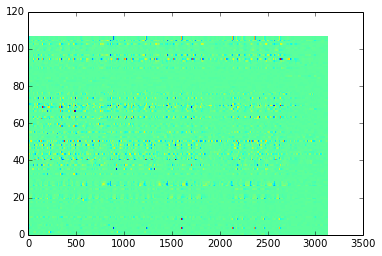

In [7]:
import transform as tf
import dimensions_kit as dk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

transformed = []
pca = []
predicted = []

for worm, data in tf.wormData.iteritems():
    wd_pca, wd_transformed = tf.scikit_pca(data['deltaFOverF_deriv'], 3)  
    
    #Storing this for later use
    transformed.append(wd_transformed)
    pca.append(wd_pca)
    """
    Using our PC's we can increase the dimensionality of 
        our reduced data, from 3 to 107, thus getting a blurred
        dataset as predicted by PC's 1 and 2. It contains
        most of the information contained in the original
        data
    
    The operation is very simple - a transformation
        of 3 dimensional data to 107 dimensional data as the 
        dot product of the components and transformed data
    """ 
    predicted.append(np.dot(wd_pca.components_.T, wd_transformed.T))
    

# How principle components are correlated with eachother
# Correlated: <>0, Not: ~ 0
# Tells you waht is common among the principle components

def plot_all_predicted(): 
    fig = plt.figure(figsize=(10,10))
    gs = gridspec.GridSpec(3,2)
    for i in range(0,len(predicted)+1):
        # So we can layout our graphs
        # nicely in two dimensions
        # we need to map n <- R^1 to n'<-R^2 
        x,y = dk.transform((3,2), i) 
        ax = fig.add_subplot(gs[x,y])
        ax.set_title('Deriv-PCA Predicted ' + str(i))
        ax.pcolor(predicted[i-1])


pred = predicted[0]
orig = tf.wormData[tf.wormData.keys()[0]]['deltaFOverF_deriv']
diff = orig.T-pred
diff.shape


# This transforms a 2d array into a set of points
pts = np.array([[x,y,diff[x,y]] for x in range(diff.shape[0]) for y in range(diff.shape[1]) ])



from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(pts[:,0], pts[:,1],pts[:,2])


ax.pcolor(diff*1000)
fig.show()